https://www.linkedin.com/pulse/text-mining-word-cloud-fundamentals-r-rohan-chikorde?trk=v-feed&lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3Bf3WCng5VT8xxQbs99l4rdA%3D%3D

In [1]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: NLP
Loading required package: RColorBrewer


Read file path from the internet

In [2]:
filePath <- "http://www.sthda.com/sthda/RDoc/example-files/martin-luther-king-i-have-a-dream
            -speech.txt"

In [3]:
txt <- readLines(filePath)

In [4]:
head(txt)

[1] ""                                                                                                                                           
[2] "And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream."
[3] " "                                                                                                                                          
[4] "I have a dream that one day this nation will rise up and live out the true meaning of its creed:"                                           
[5] " "                                                                                                                                          
[6] "We hold these truths to be self-evident, that all men are created equal."

In [5]:
str(txt)

 chr [1:46] "" ...


Load the data as a Corpus

In [6]:
docs <- Corpus(VectorSource(txt))

In [7]:
str(docs)

List of 46
 $ 1 :List of 2
  ..$ content: chr ""
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2017-04-15 05:24:22"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "1"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 $ 2 :List of 2
  ..$ content: chr "And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the Ame"| __truncated__
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2017-04-15 05:24:22"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "2"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2

In [8]:
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 46

 [1]                                                                                                                                                                                                                                                                                                                                                                                                               
 [2] And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.                                                                                                                                                                                                                                                                   
 [3]                                                                                       

Text Transformation

In [9]:
library(stringr)

In [10]:
str_replace_all(string = docs, pattern = "/"," ")

[1] "c(\"\", \"And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.\", \" \", \"I have a dream that one day this nation will rise up and live out the true meaning of its creed:\", \" \", \"We hold these truths to be self-evident, that all men are created equal.\", \" \", \"I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood.\", \n\" \", \"I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice.\", \" \", \"I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character.\", \" \", \"I have a dream today!\", \" \", \"I have a dream that one day, down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification, one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.\", \n\" \", \"I have a dream today!\", \" \", \"I have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight; and the glory of the Lord shall be revealed and all flesh shall see it together.\", \" \", \"This is our hope, and this is the faith that I go back to the South with.\", \" \", \"With this faith, we will be able to hew out of the mountain of despair a stone of hope. With this faith, we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith, we will be able to work together, to pray together, to struggle together, to go to jail together, to stand up for freedom together, knowing that we will be free one day.\", \n\" \", \"And this will be the day, this will be the day when all of God s children will be able to sing with new meaning:\", \" \", \"My country  tis of thee, sweet land of liberty, of thee I sing.\", \"Land where my fathers died, land of the Pilgrim s pride,\", \"From every mountainside, let freedom ring!\", \"And if America is to be a great nation, this must become true.\", \"And so let freedom ring from the prodigious hilltops of New Hampshire.\", \"Let freedom ring from the mighty mountains of New York.\", \"Let freedom ring from the heightening Alleghenies of Pennsylvania.\", \n\"Let freedom ring from the snow-capped Rockies of Colorado.\", \"Let freedom ring from the curvaceous slopes of California.\", \" \", \"But not only that:\", \"Let freedom ring from Stone Mountain of Georgia.\", \"Let freedom ring from Lookout Mountain of Tennessee.\", \"Let freedom ring from every hill and molehill of Mississippi.\", \"From every mountainside, let freedom ring.\", \"And when this happens, when we allow freedom ring, when we let it ring from every village and every hamlet, from every state and every city, we will be able to speed up that day when all of God s children, black men and white men, Jews and Gentiles, Protestants and Catholics, will be able to join hands and sing in the words of the old Negro spiritual:\", \n\"Free at last! Free at last!\", \" \", \"Thank God Almighty, we are free at last!\")"
[2] "list(language = \"en\")"                                                                                                                                                                                                                                                                                                                                                                                                                                

In [11]:
str_replace_all(string = docs, pattern = "@"," ")

[1] "c(\"\", \"And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.\", \" \", \"I have a dream that one day this nation will rise up and live out the true meaning of its creed:\", \" \", \"We hold these truths to be self-evident, that all men are created equal.\", \" \", \"I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood.\", \n\" \", \"I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice.\", \" \", \"I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character.\", \" \", \"I have a dream today!\", \" \", \"I have a dream that one day, down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification, one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.\", \n\" \", \"I have a dream today!\", \" \", \"I have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight; and the glory of the Lord shall be revealed and all flesh shall see it together.\", \" \", \"This is our hope, and this is the faith that I go back to the South with.\", \" \", \"With this faith, we will be able to hew out of the mountain of despair a stone of hope. With this faith, we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith, we will be able to work together, to pray together, to struggle together, to go to jail together, to stand up for freedom together, knowing that we will be free one day.\", \n\" \", \"And this will be the day, this will be the day when all of God s children will be able to sing with new meaning:\", \" \", \"My country  tis of thee, sweet land of liberty, of thee I sing.\", \"Land where my fathers died, land of the Pilgrim s pride,\", \"From every mountainside, let freedom ring!\", \"And if America is to be a great nation, this must become true.\", \"And so let freedom ring from the prodigious hilltops of New Hampshire.\", \"Let freedom ring from the mighty mountains of New York.\", \"Let freedom ring from the heightening Alleghenies of Pennsylvania.\", \n\"Let freedom ring from the snow-capped Rockies of Colorado.\", \"Let freedom ring from the curvaceous slopes of California.\", \" \", \"But not only that:\", \"Let freedom ring from Stone Mountain of Georgia.\", \"Let freedom ring from Lookout Mountain of Tennessee.\", \"Let freedom ring from every hill and molehill of Mississippi.\", \"From every mountainside, let freedom ring.\", \"And when this happens, when we allow freedom ring, when we let it ring from every village and every hamlet, from every state and every city, we will be able to speed up that day when all of God s children, black men and white men, Jews and Gentiles, Protestants and Catholics, will be able to join hands and sing in the words of the old Negro spiritual:\", \n\"Free at last! Free at last!\", \" \", \"Thank God Almighty, we are free at last!\")"
[2] "list(language = \"en\")"                                                                                                                                                                                                                                                                                                                                                                                                                                

In [12]:
str_replace_all(string = docs, pattern = "\\|"," ")

[1] "c(\"\", \"And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.\", \" \", \"I have a dream that one day this nation will rise up and live out the true meaning of its creed:\", \" \", \"We hold these truths to be self-evident, that all men are created equal.\", \" \", \"I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood.\", \n\" \", \"I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice.\", \" \", \"I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character.\", \" \", \"I have a dream today!\", \" \", \"I have a dream that one day, down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification, one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.\", \n\" \", \"I have a dream today!\", \" \", \"I have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight; and the glory of the Lord shall be revealed and all flesh shall see it together.\", \" \", \"This is our hope, and this is the faith that I go back to the South with.\", \" \", \"With this faith, we will be able to hew out of the mountain of despair a stone of hope. With this faith, we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith, we will be able to work together, to pray together, to struggle together, to go to jail together, to stand up for freedom together, knowing that we will be free one day.\", \n\" \", \"And this will be the day, this will be the day when all of God s children will be able to sing with new meaning:\", \" \", \"My country  tis of thee, sweet land of liberty, of thee I sing.\", \"Land where my fathers died, land of the Pilgrim s pride,\", \"From every mountainside, let freedom ring!\", \"And if America is to be a great nation, this must become true.\", \"And so let freedom ring from the prodigious hilltops of New Hampshire.\", \"Let freedom ring from the mighty mountains of New York.\", \"Let freedom ring from the heightening Alleghenies of Pennsylvania.\", \n\"Let freedom ring from the snow-capped Rockies of Colorado.\", \"Let freedom ring from the curvaceous slopes of California.\", \" \", \"But not only that:\", \"Let freedom ring from Stone Mountain of Georgia.\", \"Let freedom ring from Lookout Mountain of Tennessee.\", \"Let freedom ring from every hill and molehill of Mississippi.\", \"From every mountainside, let freedom ring.\", \"And when this happens, when we allow freedom ring, when we let it ring from every village and every hamlet, from every state and every city, we will be able to speed up that day when all of God s children, black men and white men, Jews and Gentiles, Protestants and Catholics, will be able to join hands and sing in the words of the old Negro spiritual:\", \n\"Free at last! Free at last!\", \" \", \"Thank God Almighty, we are free at last!\")"
[2] "list(language = \"en\")"                                                                                                                                                                                                                                                                                                                                                                                                                                

In [13]:
docs <- tm_map(docs, content_transformer(tolower))

In [17]:
docs <- tm_map(docs, removeNumbers)

In [33]:
docs <- tm_map(docs, removeWords, c(stopwords("english"),"let"))

In [34]:
docs <- tm_map(docs, removePunctuation)

In [35]:
docs <- tm_map(docs, stripWhitespace)

In [36]:
docs <- tm_map(docs, stemDocument)

Document matrix is a table containing the frequency of the words. Column names are words and row names are documents. The function TermDocumentMatrix() from text mining package can be used as follow :

In [37]:
dtm <- TermDocumentMatrix(docs)

In [38]:
m <- as.matrix(dtm)

In [39]:
v <- sort(rowSums(m), decreasing = T)

In [40]:
d <- data.frame(word = names(v), freq = v)

In [41]:
head(d)

,word,freq
will,will,17
freedom,freedom,13
ring,ring,12
dream,dream,11
day,day,11
everi,everi,9


### Generate a word cloud

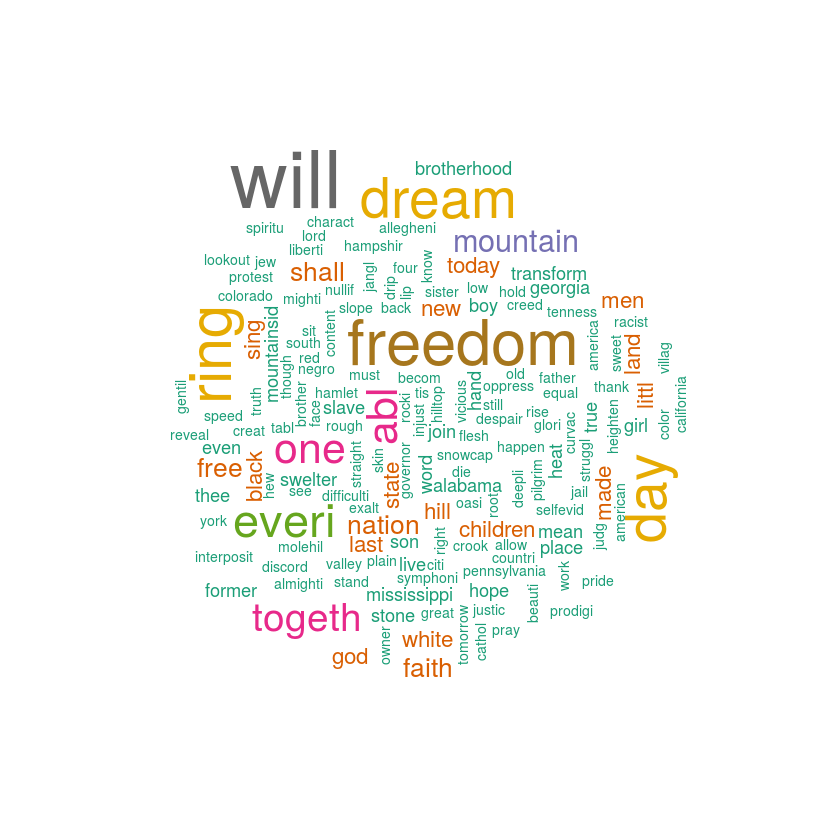

In [42]:
wordcloud(words = d$word, freq = d$freq, max.words= 200, min.freq = 1, rot.per = .35,
          colors = brewer.pal(8,"Dark2"))

You can have a look at the frequent terms in the term-document matrix as follow. In the example below we want to find words that occur at least four times :

In [43]:
findFreqTerms(dtm, lowfreq=4)

[1] "dream"    "day"      "nation"   "one"      "will"     "abl"     
 [7] "togeth"   "freedom"  "everi"    "mountain" "shall"    "faith"   
[13] "free"     "ring"

Lets find the words which are associated with freedom

In [44]:
findAssocs(dtm, terms = "freedom", corlimit = 0.3)

$freedom
       ring    mountain mississippi   transform       stone mountainsid 
       0.86        0.40        0.34        0.34        0.34        0.34 
      state       everi 
       0.32        0.32

Plot word frequencies

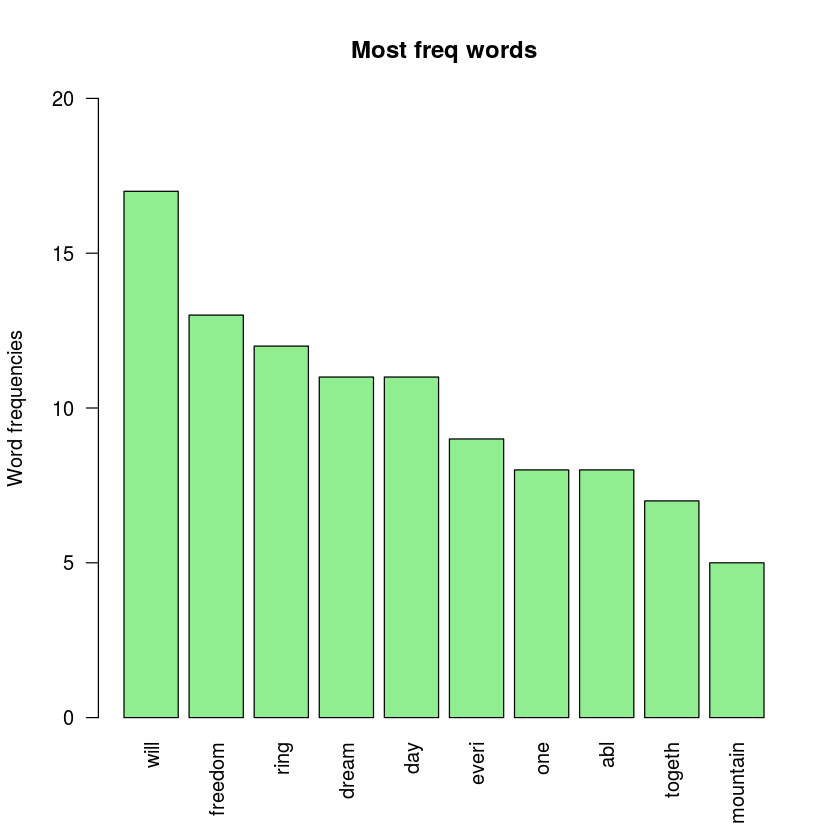

In [49]:
barplot(d[1:10,]$freq, las =2, names.arg = d[1:10,]$word, col = "lightgreen", 
        main = "Most freq words", ylab = "Word frequencies", ylim = c(0,20))